# I. Import pickled dataframe

In [2]:
import pickle, pandas as pd, matplotlib.pyplot as plt
avocados=pd.read_pickle('avoplotto.pkl')


In [8]:
type(avocados)

pandas.core.frame.DataFrame

In [9]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


# II. Visualize the data

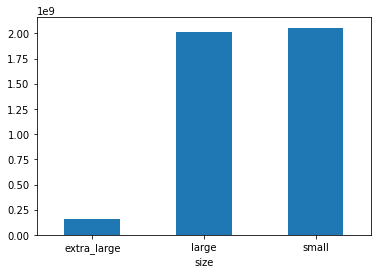

In [14]:
# bar plot 
#Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar',rot=0)

# Show the plot
plt.show()

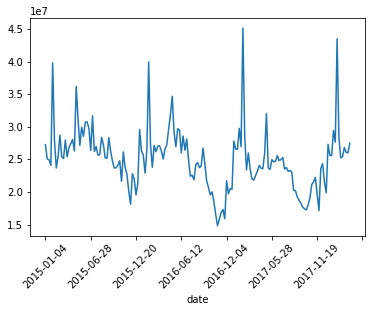

In [15]:
# line plot
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(rot=45)

# Show the plot
plt.show()

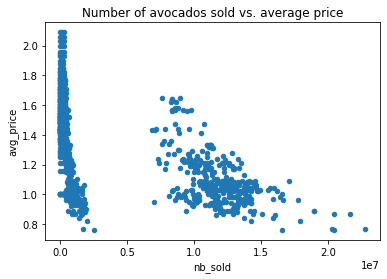

In [16]:
# scatter plot
# nb_sold vs avg_price with title
avocados.plot(kind='scatter',x='nb_sold',y='avg_price',title='Number of avocados sold vs. average price')

# Show the plot
plt.show()

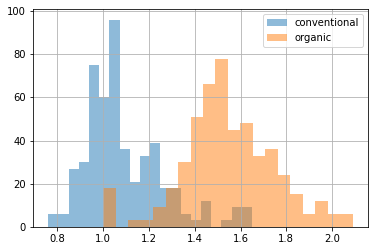

In [17]:
# histogram layering plot
# conventional type avocados average price distribution
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5,bins=20)

# organic type avocados average price distribution
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5,bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

# III. Manupulation of table (pivot, aggregation, etc.)

### III-(a). Pivot table to groupby type and size of avocatos

In [42]:
avocados_dateindexed=avocados.pivot(index='date',columns=['type','size'],values='nb_sold')
avocados_dateindexed.head()

type,conventional,organic,conventional,organic,conventional,organic
size,small,small,large,large,extra_large,extra_large
date,,,,,,
2015-01-04,12357161.34,233286.13,13624083.05,216611.20,844093.32,4370.99
2015-01-11,11544810.53,270966.74,12134773.38,260971.60,866574.66,3830.42
2015-01-18,11858139.34,254319.58,11701947.80,311811.01,831301.90,4020.85
2015-01-25,12167445.03,207494.87,10734652.82,212312.02,768020.05,4753.87
2015-02-01,18933038.04,302561.47,18956479.74,259286.44,1381516.11,5852.28


In [43]:
avocados_dateindexed2=avocados.pivot(index='date',columns=['size','type'],values='nb_sold')
avocados_dateindexed2.head()

size              small                   large             extra_large  \
type       conventional    organic conventional    organic conventional   
date                                                                      
2015-01-04  12357161.34  233286.13  13624083.05  216611.20    844093.32   
2015-01-11  11544810.53  270966.74  12134773.38  260971.60    866574.66   
2015-01-18  11858139.34  254319.58  11701947.80  311811.01    831301.90   
2015-01-25  12167445.03  207494.87  10734652.82  212312.02    768020.05   
2015-02-01  18933038.04  302561.47  18956479.74  259286.44   1381516.11   

size                 
type        organic  
date                 
2015-01-04  4370.99  
2015-01-11  3830.42  
2015-01-18  4020.85  
2015-01-25  4753.87  
2015-02-01  5852.28

### III-(b). Merge sub columns

In [52]:
# addition of conventional avocatos and organic avocatos, grouped only by size: small_total, large_total, xl_total

avocados_dateindexed2['small_total']=avocados_dateindexed2[('small','conventional')]+avocados_dateindexed2[('small','organic')]
avocados_dateindexed2['large_total']=avocados_dateindexed2[('large','conventional')]+avocados_dateindexed2[('large','organic')]
avocados_dateindexed2['xl_total']=avocados_dateindexed2[('extra_large','conventional')]+avocados_dateindexed2[('extra_large','organic')]
avocados_dateindexed2[['small_total','large_total','xl_total']].head()

size,small_total,large_total,xl_total
type,,,
date,,,
2015-01-04,12590447.47,13840694.25,848464.31
2015-01-11,11815777.27,12395744.98,870405.08
2015-01-18,12112458.92,12013758.81,835322.75
2015-01-25,12374939.90,10946964.84,772773.92
2015-02-01,19235599.51,19215766.18,1387368.39


# IV. Missing values inspection

### IV-(a). Check individual values for missing values

          date  avg_price   total_sold   small_sold   large_sold     xl_sold  \
47  2016-01-31       0.93  34721249.92  11098088.49  13278053.61  1643703.17   
48  2016-01-24       0.95  32787079.21   7020459.00  14054367.50  1440380.36   
49  2016-01-17       0.94  34426341.87  10036597.84  13832256.04  1419405.62   
50  2016-01-10       0.93  35264336.01          NaN  13226088.66  1282612.91   
51  2016-01-03       0.86  38142088.04          NaN  16054083.86  1560068.62   

    total_bags_sold  small_bags_sold  large_bags_sold  xl_bags_sold  
47       8701404.65       6684515.27       1823889.58     192999.80  
48      10271872.35       7438489.60       2668368.01     165014.74  
49       9138082.37       6846324.06       2228420.91      63337.40  
50       9314347.55       6735384.32       2528089.14      50874.09  
51       8911429.39       6464895.83       2287449.76     159083.80  
date               False
avg_price          False
total_sold         False
small_sold          True

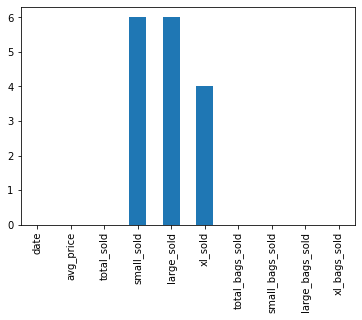

In [8]:
# Note that because the date isn't set as an index, a condition that contains only a year, such as df["date"] == "2009"
# will check if the date is equal to the first day of the first month of the year (e.g. 2009-01-01),
# rather than checking whether the date occurs within the given year. 
# We recommend writing out the full date when using Boolean conditions (e.g., 2009-12-31).
avocados_2016=pd.read_pickle('avos_2016.pkl')
print(avocados_2016.tail())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

In [21]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())


date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


### IV-(b). replaceing missing value

In [10]:
avocados_2016.fillna(0)

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,2016-12-25,1.00,30287853.70,9255125.20,10282925.61,541972.42,10207830.47,7709584.33,2417144.92,81101.22
1,2016-12-18,0.96,29583882.61,9394065.91,10339168.20,427872.42,9422776.08,6970320.34,2358443.96,94011.78
2,2016-12-11,0.98,30093540.70,9009996.11,0.00,403047.93,10713276.64,8149438.75,2490495.07,73342.82
3,2016-12-04,1.00,31621221.90,11043350.90,9908982.97,428009.84,10240878.19,7187022.58,2988504.98,65350.63
4,2016-11-27,1.21,22923062.65,7891487.94,7337341.77,0.00,7349757.04,5691266.56,1609867.20,48623.28
5,2016-11-20,1.27,24989702.75,0.00,8033510.82,407567.78,8017463.63,6207080.46,1765673.77,44709.40
6,2016-11-13,1.36,24075126.49,8235135.43,7759608.21,477520.95,7602861.90,5602593.66,1957163.93,43104.31
7,2016-11-06,1.44,22534698.38,7804252.91,0.00,505349.44,7098159.72,5245066.66,1812174.32,40918.74
8,2016-10-30,1.43,21009730.21,7100458.82,6852046.35,453145.26,6604079.78,4655045.62,1882750.65,66283.51
9,2016-10-23,1.34,24753513.95,7579629.06,8104522.26,452383.96,8616978.67,6508666.81,2016513.03,91798.83
